# Практика

## Определение вероятности. События

Требуется сгенерировать необходимые выборки и произвести по ним расчеты

### Задача 1
Брошено две монеты. Найти вероятность того, что монеты выпали разными сторонами

In [1]:
import numpy as np
import pandas as pd
from random import seed, randint
# 1 - герб, 0 - решка
N=1000000 # число событий
t1 = np.random.randint(0, 2, size=N)
t2 = np.random.randint(0, 2, size=N)
cases = pd.DataFrame(zip(t1,t2), columns = ['Coin1', 'Coin2'])
p = cases[cases['Coin1'] != cases['Coin2']].shape[0]/N
p

0.500307

### Задача 2
Брошено три монеты. Описать множество всех элементарных событий. Найти вероятности следующих событий:


1.   A = {не выпало ни одного герба}
2.   B = {выпало четное число гербов}
3.   C = {на третьей монете выпал герб}


In [2]:
# 1 - герб, 0 - решка
N=1000000 # число событий
t1 = np.random.randint(0, 2, size=N)
t2 = np.random.randint(0, 2, size=N)
t3 = np.random.randint(0, 2, size=N)
cases = pd.DataFrame(zip(t1,t2,t3), columns = ['Coin1', 'Coin2', 'Coin3'])

A = cases[(cases['Coin1'] + cases['Coin2'] + cases['Coin3']) == 0].shape[0]/N
B = cases[(cases['Coin1'] + cases['Coin2'] + cases['Coin3']) == 2].shape[0]/N
C = cases[(cases['Coin3']) == 1].shape[0]/N
print(f"A={A};\nB={B};\nC={C};")

A=0.125163;
B=0.375303;
C=0.499884;


Предлагается также решить задачи: 

### Задача 3
Из двух претендентов E и L на ответственную должность три члена комиссии должны отобрать одного. Каждый член комиссии должен указать либо одного достойного, либо забраковать обоих. Претендент считается выбранным, если он был признана достойным хотя бы двумя членами комиссии.
Найти вероятность событий:

A = {рекомендован L}, B = {рекомендован E}


In [3]:
# NoOne - 0, E - 1, L - 2
N = 100000 # число событий

g1 = np.random.randint(0, 3, size=N)
g2 = np.random.randint(0, 3, size=N)
g3 = np.random.randint(0, 3, size=N)

cases = pd.DataFrame(zip(g1, g2, g3), columns = ['g1', 'g2', 'g3'])

def conditionA(g1, g2, g3):
    result = g1.copy() * 0
    
    for key, val in pd.Series(g1).items():
        result[key] = (1 if g1[key] == 2 else 0) + (1 if g2[key] == 2 else 0) + (1 if g3[key] == 2 else 0)
    
    return pd.Series(result) >= 2 

def conditionB(g1, g2, g3):
    result = g1.copy() * 0
    
    for key, val in pd.Series(g1).items():
        result[key] = (1 if g1[key] == 1 else 0) + (1 if g2[key] == 1 else 0) + (1 if g3[key] == 1 else 0)
    
    return pd.Series(result) >= 2


A = cases[conditionA(g1, g2, g3)].shape[0]/N
B = cases[conditionB(g1, g2, g3)].shape[0]/N

print(f"A={A};\nB={B};")

A=0.25774;
B=0.25912;


### Задача 4
Брошено две игральных кости. Описать множество элементарных событий. Найти вероятности событий:

A = {вышло две "шестерки"}

B = {сумма выпавших очков не меньше 11}

C = {не выпала ни одна "шестерка"}

In [4]:
N = 100000 # число событий

k1 = np.random.randint(1, 7, size=N)
k2 = np.random.randint(1, 7, size=N)
cases = pd.DataFrame(zip(k1, k2), columns = ['k1', 'k2'])
A = cases[(cases['k1'] + cases['k2']) == 12].shape[0]/N
B = cases[(cases['k1'] + cases['k2']) >= 11].shape[0]/N

def conditionC(k1, k2):
    result = k1.copy() * 0
    for key, val in pd.Series(k1).items():
             result[key] = (0 if k1[key] == 6 else 1) + (0 if k2[key] == 6 else 1) 
    return pd.Series(result)>=2
C = cases[conditionC(k1, k2)].shape[0]/N

print(f"A={A};\nB={B};\nC={C}")

A=0.02739;
B=0.08232;
C=0.69757


## Вероятность суммы событий

### Задача 5
Брошены две игральные кости. Найти вероятность события D = {выпала хотя бы одна шестёрка}


In [5]:
N = 100000 # число событий

k1 = np.random.randint(1, 7, size=N)
k2 = np.random.randint(1, 7, size=N)
cases = pd.DataFrame(zip(k1, k2), columns = ['k1', 'k2'])
def conditionD(k1, k2):
    result = k1.copy() * 0
    for key, val in pd.Series(k1).items():
             result[key] = (1 if k1[key] == 6 else 0) + (1 if k2[key] == 6 else 0) 
    return pd.Series(result)>=1
D = cases[conditionD(k1, k2)].shape[0]/N

print(f"D={D}")

D=0.3067


Предлагается также решить задачи: 

### Задача 6
В телефонном номере три последние цифры стерлись. Считая, что все возможные значения стершихся цифр равновероятны, найти вероятность событий:

A = {Стерлись различные цифры},

B = {Стерлись одинаковые цифры},

C = {Среди стершихся цифр хотя бы две совпадают},

D = {Среди стершихся цифр хотя бы две различны}


In [6]:
N = 100000 # число событий

num1 = np.random.randint(0, 10, size=N)
num2 = np.random.randint(0, 10, size=N)
num3 = np.random.randint(0, 10, size=N)
cases = pd.DataFrame(zip(num1, num2, num3), columns = ['num1', 'num2', 'num3'])

def conditionA(num1, num2, num3):
    result = num1.copy() * 0
    for key, val in pd.Series(num1).items():
             result[key] = (1 if num1[key] != num2[key] and num2[key] != num3[key] and num3[key] != num1[key] else 0)
    return pd.Series(result)>=1

A = cases[conditionA(num1, num2, num3)].shape[0]/N

def conditionB(num1, num2, num3):
    result = num1.copy() * 0
    for key, val in pd.Series(num1).items():
             result[key] = (1 if num1[key] == num2[key] and num2[key] == num3[key] else 0)
    return pd.Series(result)>=1

B = cases[conditionB(num1, num2, num3)].shape[0]/N

def conditionC(num1, num2, num3):
    result = num1.copy() * 0
    for key, val in pd.Series(num1).items():
             result[key] = (1 if num1[key] == num2[key] or num2[key] == num3[key] or num3[key] == num1[key] else 0)
    return pd.Series(result)>=1

C = cases[conditionC(num1, num2, num3)].shape[0]/N

def conditionD(num1, num2, num3):
    result = num1.copy() * 0
    for key, val in pd.Series(num1).items():
             result[key] = (1 if num1[key] != num2[key] or num2[key] != num3[key] or num3[key] != num1[key] else 0)
    return pd.Series(result)>=1

D = cases[conditionD(num1, num2, num3)].shape[0]/N

print(f"A={A};\nB={B};\nC={C};\nD={D}")

A=0.72022;
B=0.00989;
C=0.27978;
D=0.99011


## Случайные величины

### Задача 7
В лотерее имеется 10 билетов, из которых один выигрышный. Размер выигрыша 10 ден. ед.; стоимость билета 1 ден ед. Найти закон распределения случайной величины X, равной чистому выигрышу участника лотереи, который вытаскивает билет первым.

In [7]:
# Используем Распределение Бернулли 
N = 10
p = 1/N
q = 1-p

print(f"p={p};\nq={q}")

p=0.1;
q=0.9


Предлагается также решить задачу: 

### Задача 8
Брошены две игральные кости. Найти закон распределения случайной величины $X$, равной сумме выпавших очков. Найти вероятности событий ${X <= 4}$, ${X > 4}$

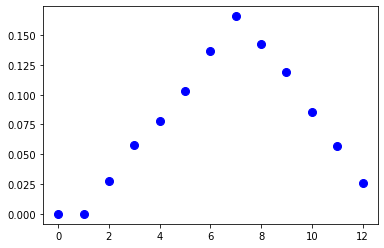

P(X<=4) ~ 0.1635;
P(X>4)  ~ 0.8365;


In [8]:
import matplotlib.pyplot as plt

N = 10000

b1 = np.random.randint(1, 7, size=N)
b2 = np.random.randint(1, 7, size=N)
max_X = 12

cases = pd.DataFrame(b1 + b2, columns = ['r'])

P = np.zeros(max_X + 1)

for i in range(max_X + 1):
    P[i] = cases[cases['r'] == i].shape[0]/N
    
plt.plot(P, 'bo', ms=8)
plt.show()

pl4 = sum([p for x, p in enumerate(P) if x <=4])
pg4 = sum([p for x, p in enumerate(P) if x > 4])

print(f"P(X<=4) ~ {pl4:1.4f};\nP(X>4)  ~ {pg4:1.4f};")

## Условные вероятности

### Задача 9
Из колоды (36 карт) вынимают последовательно без возвращения две карты. Найти вероятность того, что первой картой была шестерка, а второй — семерка. Найти условную вероятность того же события при условии, что обе карты бубновой масти.


In [9]:
# Используем формулу Байеса
#variant1 - Найти вероятность того, что первой картой была шестерка, а второй — семерка.

p6=4/36
p7=4/36
p=p6*p7


#variant2 - Найти условную вероятность того же события при условии, что обе карты бубновой масти.
p1=1/36
p2=1/35
pb=p1*p2

print(f"p={p};\np={pb}")

p=0.012345679012345678;
p=0.0007936507936507935


Предлагается также решить задачу: 

### Задача 10
Из урны, содержащей два белых и три черных шара, последовательно извлекают два шара; вынутые шары не возвращаются. Если первый шар оказался черным, то перед вторым извлечением в урну добавляют белый шар. В противном случае состав оставшихся шаров не меняют. Найти вероятности событий:

$A$ = {извлечены два белых шара},

$B$ = {извлечены два черных шара}

Указание. Пусть событие $C_1$ = {первый шар белый}, событие $C_2$ = {второй шар белый}. Тогда $A = C_1C_2$, $B = \overline C_1 \overline C_2$ 

In [10]:
# P(A) - извлечены два белых шара
C1 = 2/5  # вероятность вытянуть первый белый шар
C2 = 1/4  # вероятность вынуть второй белый шар
P_A = C1 * C2 

not_C1 = 3/5  # вероятность вытянуть первый черный шар
not_C2 = 2/5  # вероятность вытянуть второй черный шар
P_B = not_C1 * not_C2

print(f"P(A) = {P_A};\nP(B) = {P_B}")

P(A) = 0.1;
P(B) = 0.24
